In [ ]:
!pip install libsvmdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from libsvmdata import fetch_libsvm
from random import randrange
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#1 Import the data


In [ ]:
# Get data from the library
X,y = fetch_libsvm("diabetes_scale")

# Check the first 10 rows
np.shape(X)

(768, 8)

#2 Split the data into training and testing


In [ ]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Reshape the y for later operation
y_train = y_train.reshape(1, y_train.shape[0]).T
y_test = y_test.reshape(1, y_test.shape[0]).T

In [ ]:
print(np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test))

(614, 8) (614, 1) (154, 8) (154, 1)


#3 Define the perceptron model

In [ ]:
class Perceptron:
  #constructor
  def __init__ (self, w = None):
    self.w = w

  def loss_calc(self,prediction, expected):
    return max(0, -expected*prediction)

  def predict(self, X):
    output = []
    for x in X:
      prediction = np.sign(np.dot(self.w, x))
      output.append(prediction)
    return output

  def fit(self, X, Y, epochs = 1000, lr = 1):
    N = Y.shape[0]
    self.w = np.ones(X.shape[1])
    accuracy = []
    loss = []

    for i in range(epochs):
      sum_w = 0
      sum_loss = 0
      for x,y in zip(X, Y):
        error = 1 if y*np.dot(self.w,x) < 0 else 0
        sum_w += error*y*x
        sum_loss += self.loss_calc(np.dot(self.w,x), y)
      self.w = self.w + lr*sum_w
      loss.append(sum_loss/N)
      accuracy.append(accuracy_score(self.predict(X), Y))

    return np.array(loss), accuracy 

#4 Initial test of the model accuracy


##4.1 Fit the training data into the model to find the optimal weight

In [ ]:
perceptron = Perceptron()

epochs = 300
learn_rate = 0.3
loss_mt, wt_accuracy = perceptron.fit(X_train, y_train, epochs, learn_rate)

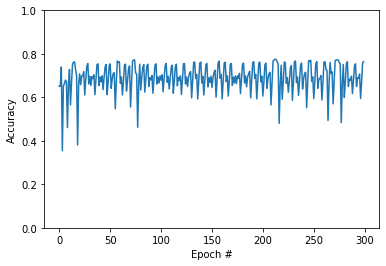

In [ ]:
plt.plot(wt_accuracy)
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.show()

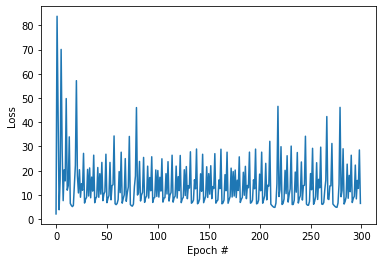

In [ ]:
plt.plot(loss_mt)
plt.xlabel("Epoch #")
plt.ylabel("Loss")
# plt.ylim([0, 1])
plt.show()

##4.2 Test the accuracy with the current model


In [ ]:
#making predictions on test data
Y_pred_test = perceptron.predict(X_test)

#checking the accuracy of the model
print(f"Accuracy:{accuracy_score(Y_pred_test, y_test)}")

Accuracy:0.7597402597402597


#5 Experiementation

# 5.1 Linear separable data set experiments

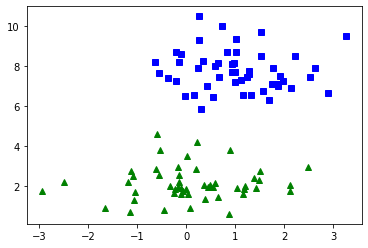

In [ ]:
from sklearn import datasets

X_sep, y_sep = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10))
y_sep[y_sep == 0] = -1
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [ ]:
# Split the data into training and testing
X_train_sep, X_test_sep, y_train_sep, y_test_sep = train_test_split(X_sep, y_sep, test_size=0.20, random_state=42)

# Reshape the y for later operation
y_train_sep = y_train_sep.reshape(1, y_train_sep.shape[0]).T
y_test_sep = y_test_sep.reshape(1, y_test_sep.shape[0]).T

In [ ]:
perceptron = Perceptron()

epochs = 300
learn_rate = 0.3
loss_mt_sep, wt_accuracy_sep = perceptron.fit(X_train_sep, y_train_sep, epochs, learn_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


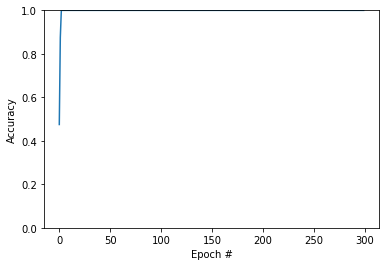

In [ ]:
plt.plot(wt_accuracy_sep)
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.show()

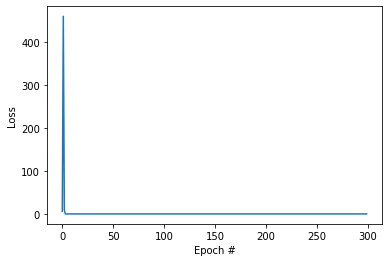

In [ ]:
plt.plot(loss_mt_sep)
plt.xlabel("Epoch #")
plt.ylabel("Loss")
# plt.ylim([0, 1])
plt.show()

In [ ]:
#making predictions on test data
Y_pred_test_sep = perceptron.predict(X_test_sep)

#checking the accuracy of the model
print(f"Accuracy:{accuracy_score(Y_pred_test_sep, y_test_sep)}")

Accuracy:1.0


## 5.2 Epoch change experiments

In [ ]:
def loss_calc(prediction, expected):
  sum = 0
  for p,e in zip(prediction,expected):
    sum += max(0, -e*p)
  return sum

In [84]:
epochs = 300

accuracy_records = []
best_accuracy = 0
best_lr = 0.5
loss = []

for learn_rate in np.arange(0, 1, 0.1):
  lost_mt = perceptron.fit(X_train, y_train, epochs, learn_rate)
  #making predictions on test data
  Y_pred_test = perceptron.predict(X_test)

  #checking the accuracy of the model
  accuracy = accuracy_score(Y_pred_test, y_test)
  accuracy_records.append(accuracy)
  loss.append(loss_calc(Y_pred_test, y_test))
  print(f"\nAccuracy for epochs = 10000 and learn rate {learn_rate}:{accuracy}")

  if best_accuracy < accuracy:
    best_accuracy = accuracy
    best_lr = learn_rate

print(f"\nBest accuracy when changing learn rate is at {best_lr} and the accuracy is {best_accuracy}")


Accuracy for epochs = 10000 and learn rate 0.0:0.33766233766233766

Accuracy for epochs = 10000 and learn rate 0.1:0.6428571428571429

Accuracy for epochs = 10000 and learn rate 0.2:0.7142857142857143

Accuracy for epochs = 10000 and learn rate 0.30000000000000004:0.7597402597402597

Accuracy for epochs = 10000 and learn rate 0.4:0.7727272727272727

Accuracy for epochs = 10000 and learn rate 0.5:0.7857142857142857

Accuracy for epochs = 10000 and learn rate 0.6000000000000001:0.6688311688311688

Accuracy for epochs = 10000 and learn rate 0.7000000000000001:0.7012987012987013

Accuracy for epochs = 10000 and learn rate 0.8:0.6363636363636364

Accuracy for epochs = 10000 and learn rate 0.9:0.6818181818181818

Best accuracy when changing learn rate is at 0.5 and the accuracy is 0.7857142857142857


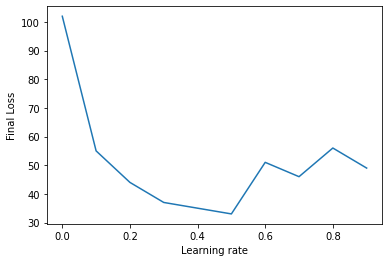

In [86]:
plt.plot(np.arange(0, 1, 0.1), loss)
plt.xlabel("Learning rate")
plt.ylabel("Final Loss")
plt.show()

## 5.3 Test by changing the number of iteration (epochs)

Using the optimal learning rate from the previous test we change the number of iteration

In [77]:
learn_rate = 0.5

accuracy_records = []
best_accuracy = 0
best_epochs = 10000
loss = []

for epochs in range(100, 1000, 100):
  lost_mt = perceptron.fit(X_train, y_train, epochs, learn_rate)
  #making predictions on test data
  Y_pred_test = perceptron.predict(X_test)

  #checking the accuracy of the model
  accuracy = accuracy_score(Y_pred_test, y_test)
  accuracy_records.append(accuracy)
  loss.append(loss_calc(Y_pred_test, y_test))
  print(f"\nAccuracy for epochs = {epochs} and learn rate {learn_rate}:{accuracy}")

  if best_accuracy < accuracy:
    best_accuracy = accuracy
    best_epochs = epochs

print(f"\nBest accuracy when changing iterations(epochs) is at {epochs} and the accuracy is {best_accuracy}")


Accuracy for epochs = 100 and learn rate 0.5:0.6883116883116883

Accuracy for epochs = 200 and learn rate 0.5:0.6688311688311688

Accuracy for epochs = 300 and learn rate 0.5:0.7857142857142857

Accuracy for epochs = 400 and learn rate 0.5:0.6818181818181818

Accuracy for epochs = 500 and learn rate 0.5:0.6298701298701299

Accuracy for epochs = 600 and learn rate 0.5:0.6363636363636364

Accuracy for epochs = 700 and learn rate 0.5:0.6623376623376623

Accuracy for epochs = 800 and learn rate 0.5:0.7272727272727273

Accuracy for epochs = 900 and learn rate 0.5:0.6363636363636364

Best accuracy when changing iterations(epochs) is at 900 and the accuracy is 0.7857142857142857


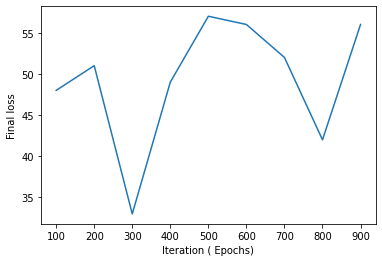

In [78]:
plt.plot(range(100, 1000, 100), loss)
plt.xlabel("Iteration ( Epochs)")
plt.ylabel("Final loss")
plt.show()

## 5.3 Test using the Scikit-Learn library 

In [ ]:
from sklearn.linear_model import Perceptron

Using the results from the 2 previous test we use the optimal iteration and learning rate.

In [ ]:
model = Perceptron(eta0=0.5, max_iter = 900)
# fit model
model.fit(X_train, y_train)

# y_pred = []
# for x in X_test:
y_pred = model.predict(X_test)

print(f"\nAccuracy for epochs = {900} and learn rate {0.5}:{accuracy_score(y_pred, y_test)}")



Accuracy for epochs = 900 and learn rate 0.5:0.7012987012987013


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model = Perceptron(eta0=0.5, max_iter = 900)
# fit model
model.fit(X_train_sep, y_train_sep)

# y_pred = []
# for x in X_test:
y_pred = model.predict(X_test_sep)

print(f"\nAccuracy for epochs = {900} and learn rate {0.5}:{accuracy_score(y_pred, y_test_sep)}")


Accuracy for epochs = 900 and learn rate 0.5:1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
